# Capstone Regression Project

## Business Understanding

At an important meeting that occurred at the local taco house, the company head of *MSB, INC.* wondered if it was possible to see any changes in the buying habits of 'average' people in the King's County area during 2021 and 2022 of the pandemic. Now, assuming we have a data set / analysis of pre-COVID years and 2020 to compare it to, to see what major features will effect the price. 

## Data Understanding

 ### Data Source
    
    This data set is complied from data from the King's County Assessors office and the location data was mined using a third party API. 
    
 ### Column Details

* `id` - Unique identifier for a house
* `date` - Date house was sold
* `price` - Sale price (prediction target)
* `bedrooms` - Number of bedrooms
* `bathrooms` - Number of bathrooms
* `sqft_living` - Square footage of living space in the home
* `sqft_lot` - Square footage of the lot
* `floors` - Number of floors (levels) in house
* `waterfront` - Whether the house is on a waterfront
  * Includes Duwamish, Elliott Bay, Puget Sound, Lake Union, Ship Canal, Lake Washington, Lake Sammamish, other lake, and river/slough waterfronts
* `greenbelt` - Whether the house is adjacent to a green belt
* `nuisance` - Whether the house has traffic noise or other recorded nuisances
* `view` - Quality of view from house
  * Includes views of Mt. Rainier, Olympics, Cascades, Territorial, Seattle Skyline, Puget Sound, Lake Washington, Lake Sammamish, small lake / river / creek, and other
* `condition` - How good the overall condition of the house is. Related to maintenance of house.
  * Relative to age and grade. Coded 1-5.
      * 1 = Poor - Worn out. Repair and overhaul needed on painted surfaces, roofing, plumbing, heating and numerous functional inadequacies. Excessive deferred maintenance and abuse, limited value-in-use, approaching abandonment or major reconstruction; reuse or change in occupancy is imminent. Effective age is near the end of the scale regardless of the actual chronological age.
      * 2 = Fair - Badly worn. Much repair needed. Many items need refinishing or overhauling, deferred maintenance obvious, inadequate building utility and systems all shortening the life expectancy and increasing the effective age.
      * 3 = Average - Some evidence of deferred maintenance and normal obsolescence with age in that a few minor repairs are needed, along with some refinishing. All major components still functional and contributing toward an extended life expectancy. Effective age and utility is standard for like properties of its class and usage.
      * 4 = Good - No obvious maintenance required but neither is everything new. Appearance and utility are above the standard and the overall effective age will be lower than the typical property.
      * 5 = Very Good - All items well maintained, many having been overhauled and repaired as they have shown signs of wear, increasing the life expectancy and lowering the effective age with little deterioration or obsolescence evident with a high degree of utility.
* `grade` - Overall grade of the house. Related to the construction and design of the house.
    * Represents the construction quality of improvements. Grades run from grade 1 to 13. Generally defined as:
        * 1-3 = Falls short of minimum building standards. Normally cabin or inferior structure.
        * 4 = Generally older, low quality construction. Does not meet code.
        * 5 = Low construction costs and workmanship. Small, simple design.
        * 6 = Lowest grade currently meeting building code. Low quality materials and simple designs.
        * 7 = Average grade of construction and design. Commonly seen in plats and older sub-divisions.
        * 8 = Just above average in construction and design. Usually better materials in both the exterior and interior finish work.
        * 9 = Better architectural design with extra interior and exterior design and quality.
        * 10 = Homes of this quality generally have high quality features. Finish work is better and more design quality is seen in the floor plans. Generally have a larger square footage.
        * 11 = Custom design and higher quality finish work with added amenities of solid woods, bathroom fixtures and more luxurious options.
        * 12 = Custom design and excellent builders. All materials are of the highest quality and all conveniences are present.
        * 13 = Generally custom designed and built. Mansion level. Large amount of highest quality cabinet work, wood trim, marble, entry ways etc.
* `heat_source` - Heat source for the house
* `sewer_system` - Sewer system for the house
* `sqft_above` - Square footage of house apart from basement
* `sqft_basement` - Square footage of the basement
* `sqft_garage` - Square footage of garage space
* `sqft_patio` - Square footage of outdoor porch or deck space
* `yr_built` - Year when house was built
* `yr_renovated` - Year when house was renovated
* `address` - The street address
* `lat` - Latitude coordinate
* `long` - Longitude coordinate


## Data Preparation

In [152]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels.api as sm

### Loading the Data

Importing the csv into a dataframe.

In [153]:
data = pd.read_csv("./data/kc_house_data.csv", index_col=0)

In [154]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

### Data Exploration

Time to see what we're working with.

In [155]:
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
id,,,,,,,,,,,,,,,,,,,,,
7399300360,5/24/2022,675000.00,4,1.00,1180,7140,1.00,NO,NO,NO,...,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.46,-122.19
8910500230,12/13/2021,920000.00,5,2.50,2770,6703,1.00,NO,NO,YES,...,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.71,-122.36
1180000275,9/29/2021,311000.00,6,2.00,2880,6156,1.00,NO,NO,NO,...,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.50,-122.23
1604601802,12/14/2021,775000.00,3,3.00,2160,1400,2.00,NO,NO,NO,...,PUBLIC,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.57,-122.29
8562780790,8/24/2021,592500.00,2,2.00,1120,758,2.00,NO,NO,YES,...,PUBLIC,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.53,-122.07


In [156]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30155 entries, 7399300360 to 9557800100
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           30155 non-null  object 
 1   price          30155 non-null  float64
 2   bedrooms       30155 non-null  int64  
 3   bathrooms      30155 non-null  float64
 4   sqft_living    30155 non-null  int64  
 5   sqft_lot       30155 non-null  int64  
 6   floors         30155 non-null  float64
 7   waterfront     30155 non-null  object 
 8   greenbelt      30155 non-null  object 
 9   nuisance       30155 non-null  object 
 10  view           30155 non-null  object 
 11  condition      30155 non-null  object 
 12  grade          30155 non-null  object 
 13  heat_source    30123 non-null  object 
 14  sewer_system   30141 non-null  object 
 15  sqft_above     30155 non-null  int64  
 16  sqft_basement  30155 non-null  int64  
 17  sqft_garage    30155 non-null  int64

It looks like heat_source and sewer_system are the only two categories are that are short on data points.
The other columns are fully stocked. 

In [157]:
data.heat_source.value_counts()

Gas                  20583
Electricity           6465
Oil                   2899
Gas/Solar               93
Electricity/Solar       59
Other                   20
Oil/Solar                4
Name: heat_source, dtype: int64

In [158]:
data.sewer_system.value_counts()

PUBLIC                25777
PRIVATE                4355
PRIVATE RESTRICTED        6
PUBLIC RESTRICTED         3
Name: sewer_system, dtype: int64

Now lets see what the other columns have in them. We know though that `date`, `price`, `sqft_living`, `sqft_lot`, `sqft_above`, `sqft_basement`, `sqft_patio` are pretty much continuous data. `address`, `lat`, and `long` are geolocation data which we won't be dealing with and will be dropping. 

In [159]:
data.bedrooms.value_counts()

3     12754
4      9597
2      3936
5      2798
6       498
1       391
7        80
0        44
8        38
9        14
10        3
11        1
13        1
Name: bedrooms, dtype: int64

`bedrooms` is discrete data.  I think I will drop the 0 bedroom rows since we're supposed to be working with actual houses, and the 0 bedrooms are hopefully errors due to someone not putting in the right number on a form. I am impressed with the 13 bedroom house though, but we need to see later if the larger bedroom houses act as outliers in our dataset. 

In [160]:
data.bathrooms.value_counts()

2.50     8475
2.00     7349
1.00     4576
3.00     4117
3.50     2266
1.50     1808
4.00      645
4.50      533
5.00      145
5.50      104
6.00       45
0.00       31
6.50       25
7.00       12
7.50       12
0.50        5
9.50        2
8.00        2
10.50       1
10.00       1
8.50        1
Name: bathrooms, dtype: int64

Wayyyyy to many bathrooms, though I'd appreciate one with 4. :> Another column with discrete data. I will remove the houses with 0 bathrooms. I will keep the 0.5 bathroom for now, but this is another column that may get trimmed to remove exreme outliers. Some may consider bathrooms catagorical, but it depends on how you count half baths and 3/4ths baths. 

In [161]:
data.floors.value_counts()

1.00    13962
2.00    12265
1.50     2439
3.00     1222
2.50      222
4.00       30
3.50       15
Name: floors, dtype: int64

Discrete data again, if we use this column we may have to trim for outliers.

In [162]:
data.waterfront.value_counts()

NO     29636
YES      519
Name: waterfront, dtype: int64

Catagorical data.

In [163]:
data.greenbelt.value_counts()

NO     29382
YES      773
Name: greenbelt, dtype: int64

Catagorical data.

In [164]:
data.nuisance.value_counts()

NO     24893
YES     5262
Name: nuisance, dtype: int64

Catagorical Data.

In [165]:
data.view.value_counts()

NONE         26589
AVERAGE       1915
GOOD           878
EXCELLENT      553
FAIR           220
Name: view, dtype: int64

Catagorical Data.

In [166]:
data.condition.value_counts()

Average      18547
Good          8054
Very Good     3259
Fair           230
Poor            65
Name: condition, dtype: int64

Catagorical Data.

In [167]:
data.grade.value_counts()

7 Average        11697
8 Good            9410
9 Better          3806
6 Low Average     2858
10 Very Good      1371
11 Excellent       406
5 Fair             393
12 Luxury          122
4 Low               51
13 Mansion          24
3 Poor              13
1 Cabin              2
2 Substandard        2
Name: grade, dtype: int64

Catagorical.

In [168]:
data.yr_built.value_counts()

2021    1707
1968     516
2020     507
1978     493
1977     484
        ... 
1901      39
1935      39
1934      38
1902      36
1933      30
Name: yr_built, Length: 123, dtype: int64

Discrete data.

In [169]:
data.yr_renovated.value_counts()

0       28783
2021       69
2006       49
2018       44
1990       42
        ...  
1942        1
1951        1
1948        1
1972        1
1924        1
Name: yr_renovated, Length: 83, dtype: int64

Discrete data.

Creating a `sale_year` column.

In [170]:
data['sale_year'] = data.date.map(lambda x: x[-4:])
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,...,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long,sale_year
id,,,,,,,,,,,,,,,,,,,,,
7399300360,5/24/2022,675000.00,4,1.00,1180,7140,1.00,NO,NO,NO,...,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.46,-122.19,2022
8910500230,12/13/2021,920000.00,5,2.50,2770,6703,1.00,NO,NO,YES,...,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.71,-122.36,2021
1180000275,9/29/2021,311000.00,6,2.00,2880,6156,1.00,NO,NO,NO,...,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.50,-122.23,2021
1604601802,12/14/2021,775000.00,3,3.00,2160,1400,2.00,NO,NO,NO,...,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.57,-122.29,2021
8562780790,8/24/2021,592500.00,2,2.00,1120,758,2.00,NO,NO,YES,...,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.53,-122.07,2021


In [171]:
data.sale_year.value_counts()

2021    19293
2022    10862
Name: sale_year, dtype: int64

### Data Cleaning

Dropping the `address`, `long`, and `lat` columns, we won't be dealing with location variables to save what's left of my sanity (most got left behind at the taco house). 

In [172]:
data_clean = data.drop(columns=['address', 'long', 'lat'])

In [173]:
data_clean.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,...,grade,heat_source,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,sale_year
id,,,,,,,,,,,,,,,,,,,,,
7399300360,5/24/2022,675000.00,4,1.00,1180,7140,1.00,NO,NO,NO,...,7 Average,Gas,PUBLIC,1180,0,0,40,1969,0,2022
8910500230,12/13/2021,920000.00,5,2.50,2770,6703,1.00,NO,NO,YES,...,7 Average,Oil,PUBLIC,1570,1570,0,240,1950,0,2021
1180000275,9/29/2021,311000.00,6,2.00,2880,6156,1.00,NO,NO,NO,...,7 Average,Gas,PUBLIC,1580,1580,0,0,1956,0,2021
1604601802,12/14/2021,775000.00,3,3.00,2160,1400,2.00,NO,NO,NO,...,9 Better,Gas,PUBLIC,1090,1070,200,270,2010,0,2021
8562780790,8/24/2021,592500.00,2,2.00,1120,758,2.00,NO,NO,YES,...,7 Average,Electricity,PUBLIC,1120,550,550,30,2012,0,2021


Removing the `Id` column.

In [174]:
data_clean = data_clean.reset_index(drop = True)

Dropping the null columns in `heat_source` and `sewer_system`.

In [175]:
data_clean = data_clean.dropna(subset=['heat_source', 'sewer_system'])

In [176]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30111 entries, 0 to 30154
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           30111 non-null  object 
 1   price          30111 non-null  float64
 2   bedrooms       30111 non-null  int64  
 3   bathrooms      30111 non-null  float64
 4   sqft_living    30111 non-null  int64  
 5   sqft_lot       30111 non-null  int64  
 6   floors         30111 non-null  float64
 7   waterfront     30111 non-null  object 
 8   greenbelt      30111 non-null  object 
 9   nuisance       30111 non-null  object 
 10  view           30111 non-null  object 
 11  condition      30111 non-null  object 
 12  grade          30111 non-null  object 
 13  heat_source    30111 non-null  object 
 14  sewer_system   30111 non-null  object 
 15  sqft_above     30111 non-null  int64  
 16  sqft_basement  30111 non-null  int64  
 17  sqft_garage    30111 non-null  int64  
 18  sqft_p

Dropping the 0 bedroom in `bedrooms`.

In [177]:
data_clean.drop(data_clean.index[data_clean['bedrooms'] == 0], inplace=True)

data_clean.bedrooms.value_counts()

3     12746
4      9591
2      3925
5      2794
6       498
1       381
7        80
8        38
9        14
10        3
11        1
13        1
Name: bedrooms, dtype: int64

Dropping the 0 bathrooms in `bathrooms`

In [178]:
data_clean.drop(data_clean.index[data_clean['bathrooms'] == 0], inplace=True)

data_clean.bathrooms.value_counts()

2.50     8471
2.00     7342
1.00     4541
3.00     4116
3.50     2264
1.50     1806
4.00      644
4.50      531
5.00      145
5.50      102
6.00       45
6.50       25
7.00       12
7.50       12
0.50        5
9.50        2
8.00        2
10.50       1
10.00       1
8.50        1
Name: bathrooms, dtype: int64

Lets adjust the `grade` column to go from 13 groups to 4 groups.

In [179]:
data.grade.value_counts()

7 Average        11697
8 Good            9410
9 Better          3806
6 Low Average     2858
10 Very Good      1371
11 Excellent       406
5 Fair             393
12 Luxury          122
4 Low               51
13 Mansion          24
3 Poor              13
1 Cabin              2
2 Substandard        2
Name: grade, dtype: int64

In [180]:
data_clean = data_clean.replace({
    'grade': {
        '1 Cabin': 'Poor',
        '2 Substandard': 'Poor',
        '3 Poor': 'Poor',
        '4 Low': 'Below Average',
        '5 Fair': 'Below Average',
        '6 Low Average': 'Below Average',
        '7 Average': 'Average',
        '8 Good': 'Average',
        '9 Better': 'Average',
        '10 Very Good': 'Above Average',
        '11 Excellent': 'Above Average',
        '12 Luxury' : 'Above Average',
        '13 Mansion': 'Above Average'
      
    }
}
)

In [181]:
data_clean.grade.value_counts()

Average          24871
Below Average     3271
Above Average     1920
Poor                 6
Name: grade, dtype: int64

# First Model

Making a copy of our intial data to work with.

In [182]:
model_data = data_clean

In [183]:
model_data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,...,grade,heat_source,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,sale_year
0,5/24/2022,675000.00,4,1.00,1180,7140,1.00,NO,NO,NO,...,Average,Gas,PUBLIC,1180,0,0,40,1969,0,2022
1,12/13/2021,920000.00,5,2.50,2770,6703,1.00,NO,NO,YES,...,Average,Oil,PUBLIC,1570,1570,0,240,1950,0,2021
2,9/29/2021,311000.00,6,2.00,2880,6156,1.00,NO,NO,NO,...,Average,Gas,PUBLIC,1580,1580,0,0,1956,0,2021
3,12/14/2021,775000.00,3,3.00,2160,1400,2.00,NO,NO,NO,...,Average,Gas,PUBLIC,1090,1070,200,270,2010,0,2021
4,8/24/2021,592500.00,2,2.00,1120,758,2.00,NO,NO,YES,...,Average,Electricity,PUBLIC,1120,550,550,30,2012,0,2021


In [184]:
not_needed = ["date", "waterfront", "greenbelt", "nuisance", "view", "condition", "heat_source", "sewer_system", "yr_built", "yr_renovated"]

In [185]:
model_clean = data_clean.drop(columns=not_needed)

In [186]:
model_clean.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,grade,sqft_above,sqft_basement,sqft_garage,sqft_patio,sale_year
0,675000.00,4,1.00,1180,7140,1.00,Average,1180,0,0,40,2022
1,920000.00,5,2.50,2770,6703,1.00,Average,1570,1570,0,240,2021
2,311000.00,6,2.00,2880,6156,1.00,Average,1580,1580,0,0,2021
3,775000.00,3,3.00,2160,1400,2.00,Average,1090,1070,200,270,2021
4,592500.00,2,2.00,1120,758,2.00,Average,1120,550,550,30,2021


Lets dummy out the house grade `grade`, just to see what happens if we do include it into the model.

In [187]:
model_clean = pd.get_dummies(data=model_clean, columns=["grade"], drop_first=True)

In [188]:
model_clean.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,sale_year,grade_Average,grade_Below Average,grade_Poor
0,675000.00,4,1.00,1180,7140,1.00,1180,0,0,40,2022,1,0,0
1,920000.00,5,2.50,2770,6703,1.00,1570,1570,0,240,2021,1,0,0
2,311000.00,6,2.00,2880,6156,1.00,1580,1580,0,0,2021,1,0,0
3,775000.00,3,3.00,2160,1400,2.00,1090,1070,200,270,2021,1,0,0
4,592500.00,2,2.00,1120,758,2.00,1120,550,550,30,2021,1,0,0


Let's look at the correlation so far for the dataset.

In [189]:
model_clean.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,grade_Average,grade_Below Average,grade_Poor
price,1.00,0.29,0.48,0.61,0.09,0.18,0.54,0.25,0.27,0.32,-0.18,-0.18,-0.01
bedrooms,0.29,1.00,0.59,0.64,0.01,0.15,0.55,0.24,0.32,0.18,0.10,-0.29,-0.02
bathrooms,0.48,0.59,1.00,0.77,0.04,0.41,0.68,0.26,0.46,0.33,0.08,-0.40,-0.02
sqft_living,0.61,0.64,0.77,1.00,0.12,0.30,0.88,0.34,0.51,0.40,-0.06,-0.34,-0.02
sqft_lot,0.09,0.01,0.04,0.12,1.00,-0.03,0.13,0.01,0.09,0.16,-0.08,0.02,0.03
floors,0.18,0.15,0.41,0.30,-0.03,1.00,0.45,-0.25,0.13,0.13,0.11,-0.27,-0.01
sqft_above,0.54,0.55,0.68,0.88,0.13,0.45,1.00,-0.07,0.56,0.31,-0.09,-0.30,-0.01
sqft_basement,0.25,0.24,0.26,0.34,0.01,-0.25,-0.07,1.00,0.03,0.21,0.04,-0.13,-0.01
sqft_garage,0.27,0.32,0.46,0.51,0.09,0.13,0.56,0.03,1.00,0.22,0.05,-0.32,-0.02
sqft_patio,0.32,0.18,0.33,0.40,0.16,0.13,0.31,0.21,0.22,1.00,-0.04,-0.15,-0.01


<AxesSubplot:>

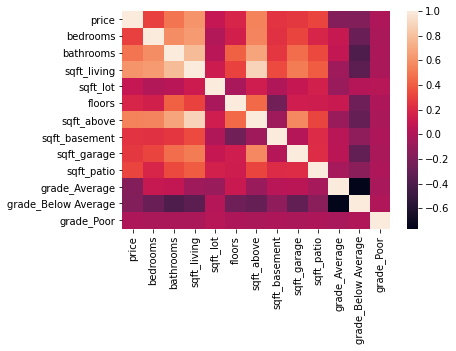

In [190]:
sns.heatmap(model_clean.corr())

In [191]:
model_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30068 entries, 0 to 30154
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   price                30068 non-null  float64
 1   bedrooms             30068 non-null  int64  
 2   bathrooms            30068 non-null  float64
 3   sqft_living          30068 non-null  int64  
 4   sqft_lot             30068 non-null  int64  
 5   floors               30068 non-null  float64
 6   sqft_above           30068 non-null  int64  
 7   sqft_basement        30068 non-null  int64  
 8   sqft_garage          30068 non-null  int64  
 9   sqft_patio           30068 non-null  int64  
 10  sale_year            30068 non-null  object 
 11  grade_Average        30068 non-null  uint8  
 12  grade_Below Average  30068 non-null  uint8  
 13  grade_Poor           30068 non-null  uint8  
dtypes: float64(3), int64(7), object(1), uint8(3)
memory usage: 2.8+ MB


In [192]:
X=model_clean.drop(labels =['price', 'sale_year', 'floors'], axis=1)
y=model_clean.price

first_dummy_model = sm.OLS(y,sm.add_constant(X))
results = first_dummy_model.fit()
results.summary()

/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.443
Model:                            OLS   Adj. R-squared:                  0.443
Method:                 Least Squares   F-statistic:                     2176.
Date:                Thu, 29 Sep 2022   Prob (F-statistic):               0.00
Time:                        01:16:30   Log-Likelihood:            -4.4589e+05
No. Observations:               30068   AIC:                         8.918e+05
Df Residuals:                   30056   BIC:                         8.919e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1.063e+06   2.76e+04     38.479      0.000    1.01e+06    1.12e+06
bedrooms            -1.097e+05   5384.308    -20.370      0.000    -1.2e+05   -9.91e+04
bathrooms            8.282e+04   7221.776     11.469      0.000    6.87e+04     9.7e+04
sqft_living           227.2950     17.634     12.889      0.000     192.731     261.859
sqft_lot               -0.0901      0.066     -1.359      0.174      -0.220       0.040
sqft_above            265.2975     17.413     15.235      0.000     231.167     299.428
sqft_basement         233.2948     12.774     18.263      0.000     208.257     258.332
sqft_garage          -313.2902     16.726    -18.731      0.000    -346.073    -280.507
sqft_patio            226.3029     17.426     12.986      0.000     192.146     260.459
grade_Average       -8.429e+05   1.93e+04    -43.704      0.000   -8.81e+05   -8.05e+05
grade_Below Average -8.487e+05   2.49e+04    -34.072      0.000   -8.97e+05      -8e+05
grade_Poor          -7.948e+05   2.73e+05     -2.907      0.004   -1.33e+06   -2.59e+05
==============================================================================
Omnibus:                    43420.960   Durbin-Watson:                   1.843
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         51386647.952
Skew:                           8.198   Prob(JB):                         0.00
Kurtosis:                     204.860   Cond. No.                     4.39e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.39e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

So in our first model we have an R-value of 0.443. So this model explains 44.3% of our data points. I'm not to happy right now with the P-value of the `sqft_lot`. So lets work on adjusting that first.

# Model Iteration

For `sqft_lot`

In [193]:
model_clean.sqft_lot.describe()

count     30068.00
mean      16604.34
std       59513.90
min         402.00
25%        4850.00
50%        7479.50
75%       10564.25
max     3253932.00
Name: sqft_lot, dtype: float64

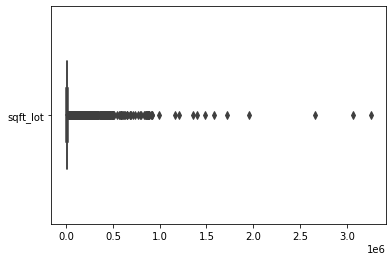

In [194]:
sns.boxplot(data=model_clean[["sqft_lot"]], orient="h", width=0.5);

Wow, there are some huge properties in this data set, but we will limit it down to lots under 200,000 sqft which is about 3 standard deviations above the mean. 

In [195]:
model_clean.loc[(model_clean['sqft_lot'] >= 200000)]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,sale_year,grade_Average,grade_Below Average,grade_Poor
39,1680000.00,3,2.50,5200,206039,1.00,3170,2030,1080,670,2021,0,0,0
43,3850000.00,5,3.50,4180,209959,1.00,4180,0,0,0,2022,1,0,0
77,1560000.00,4,3.00,3360,871200,2.00,3360,0,950,350,2021,1,0,0
79,1575000.00,4,3.50,3210,216493,2.00,3210,0,820,1290,2021,1,0,0
117,900000.00,3,2.00,1960,243936,1.50,1960,0,480,0,2021,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29335,3500000.00,4,3.00,3950,435600,1.50,3950,0,0,2040,2022,1,0,0
29360,865000.00,5,4.00,3450,239580,2.00,3450,0,0,610,2021,1,0,0
29389,600000.00,3,2.50,3150,989234,1.50,2150,1390,0,2360,2022,1,0,0
29562,3050000.00,4,4.50,4280,222157,2.00,4280,0,660,250,2022,0,0,0


In [196]:
model_clean.drop(model_clean.index[model_clean['sqft_lot'] > 200000], inplace=True)

Now let's check how the dataset looks now.

In [197]:
model_clean.sqft_lot.describe()

count    29633.00
mean     11503.85
std      17843.75
min        402.00
25%       4800.00
50%       7400.00
75%      10349.00
max     199940.00
Name: sqft_lot, dtype: float64

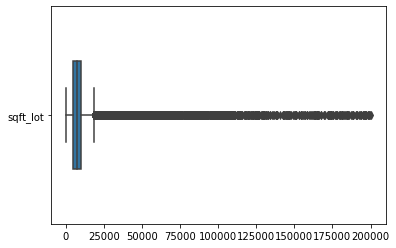

In [198]:
sns.boxplot(data=model_clean[["sqft_lot"]], orient="h", width=0.5);

The removal of the large lots really did a number on the mean and standard deviation of the `sqft_lot`. Let's rerun the model.

In [199]:
X=model_clean.drop(labels =['price', 'sale_year', 'floors'], axis=1)
y=model_clean.price

first_dummy_model = sm.OLS(y,sm.add_constant(X))
results = first_dummy_model.fit()
results.summary()

/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.449
Model:                            OLS   Adj. R-squared:                  0.449
Method:                 Least Squares   F-statistic:                     2195.
Date:                Thu, 29 Sep 2022   Prob (F-statistic):               0.00
Time:                        01:16:31   Log-Likelihood:            -4.3917e+05
No. Observations:               29633   AIC:                         8.784e+05
Df Residuals:                   29621   BIC:                         8.785e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 1.08e+06   2.78e+04     38.861      0.000    1.03e+06    1.13e+06
bedrooms            -1.166e+05   5400.620    -21.589      0.000   -1.27e+05   -1.06e+05
bathrooms            7.985e+04   7259.631     10.999      0.000    6.56e+04    9.41e+04
sqft_living           234.1995     17.810     13.150      0.000     199.292     269.107
sqft_lot               -0.6390      0.229     -2.795      0.005      -1.087      -0.191
sqft_above            273.4451     17.551     15.580      0.000     239.045     307.845
sqft_basement         241.6195     12.862     18.786      0.000     216.410     266.829
sqft_garage          -308.2576     16.999    -18.133      0.000    -341.577    -274.938
sqft_patio            242.8555     18.041     13.461      0.000     207.494     278.217
grade_Average       -8.603e+05   1.95e+04    -44.216      0.000   -8.98e+05   -8.22e+05
grade_Below Average -8.627e+05   2.51e+04    -34.433      0.000   -9.12e+05   -8.14e+05
grade_Poor          -7.415e+05   2.97e+05     -2.498      0.012   -1.32e+06    -1.6e+05
==============================================================================
Omnibus:                    43195.549   Durbin-Watson:                   1.846
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         54448399.045
Skew:                           8.336   Prob(JB):                         0.00
Kurtosis:                     212.333   Cond. No.                     1.65e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.65e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

We lowered to P value to .005 for `sqft_lot`, but R-Value only increased to .449. Could we still have a problem with outliers?

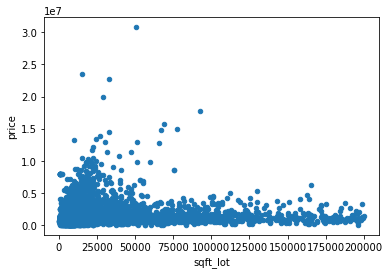

In [200]:
model_clean.plot(x="sqft_lot", y="price", kind="scatter");

Well, for sure we have a large grouping in the sub 100k range. Let's cut down lot size again.

In [201]:
model_clean.drop(model_clean.index[model_clean['sqft_lot'] > 100000], inplace=True)

In [202]:
model_clean.sqft_lot.describe()

count   29317.00
mean    10144.70
std     11759.18
min       402.00
25%      4800.00
50%      7350.00
75%     10171.00
max     99916.00
Name: sqft_lot, dtype: float64

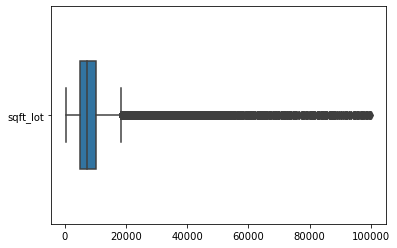

In [203]:
sns.boxplot(data=model_clean[["sqft_lot"]], orient="h", width=0.5);

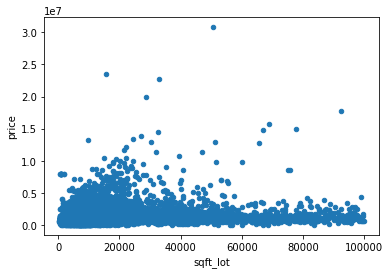

In [204]:
model_clean.plot(x="sqft_lot", y="price", kind="scatter");

Let's rerun the model again.

In [205]:
X=model_clean.drop(labels =['price', 'sale_year', 'floors'], axis=1)
y=model_clean.price

first_dummy_model = sm.OLS(y,sm.add_constant(X))
results = first_dummy_model.fit()
results.summary()

/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.450
Model:                            OLS   Adj. R-squared:                  0.450
Method:                 Least Squares   F-statistic:                     2178.
Date:                Thu, 29 Sep 2022   Prob (F-statistic):               0.00
Time:                        01:16:31   Log-Likelihood:            -4.3442e+05
No. Observations:               29317   AIC:                         8.689e+05
Df Residuals:                   29305   BIC:                         8.690e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 1.08e+06    2.8e+04     38.579      0.000    1.02e+06    1.13e+06
bedrooms            -1.191e+05   5434.012    -21.925      0.000    -1.3e+05   -1.08e+05
bathrooms            8.367e+04   7322.310     11.427      0.000    6.93e+04     9.8e+04
sqft_living           230.1951     17.961     12.816      0.000     194.991     265.399
sqft_lot                0.7539      0.355      2.123      0.034       0.058       1.450
sqft_above            278.5336     17.667     15.766      0.000     243.906     313.161
sqft_basement         246.3186     12.946     19.027      0.000     220.945     271.693
sqft_garage          -323.4485     17.307    -18.689      0.000    -357.372    -289.525
sqft_patio            240.2028     18.318     13.113      0.000     204.298     276.108
grade_Average       -8.701e+05   1.96e+04    -44.345      0.000   -9.09e+05   -8.32e+05
grade_Below Average -8.803e+05   2.52e+04    -34.891      0.000    -9.3e+05   -8.31e+05
grade_Poor          -8.361e+05   3.82e+05     -2.191      0.028   -1.58e+06    -8.8e+04
==============================================================================
Omnibus:                    42776.626   Durbin-Watson:                   1.846
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         54554142.785
Skew:                           8.349   Prob(JB):                         0.00
Kurtosis:                     213.669   Cond. No.                     1.55e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.55e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Well, we reduced the P-value some more, and barely increased our R-value. But it looks like we have alot of high price houses that are being outliers. Let's limit our prices to something more 'average'.

In [206]:
model_clean.price.describe()

count      29317.00
mean     1100036.46
std       889003.53
min        27360.00
25%       643087.00
50%       855000.00
75%      1300000.00
max     30750000.00
Name: price, dtype: float64

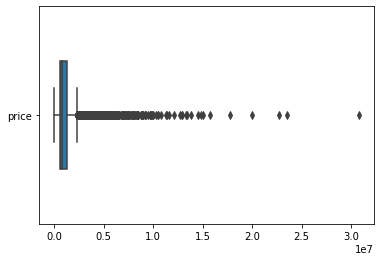

In [207]:
sns.boxplot(data=model_clean[["price"]], orient="h", width=0.5);

Let's remove some of the high end prices, and go with a more "reasonable" limit of $5 million. 

In [208]:
model_clean.drop(model_clean.index[model_clean['price'] > 5000000], inplace=True)

In [209]:
model_clean.price.describe()

count     29119.00
mean    1055520.36
std      652291.96
min       27360.00
25%      640000.00
50%      850000.00
75%     1280437.50
max     5000000.00
Name: price, dtype: float64

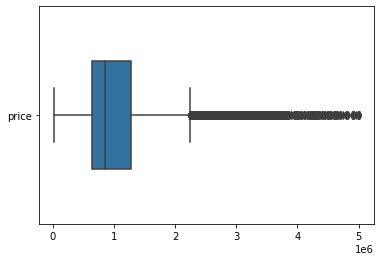

In [210]:
sns.boxplot(data=model_clean[["price"]], orient="h", width=0.5);

And another iteration.

In [211]:
X=model_clean.drop(labels =['price', 'sale_year', 'floors'], axis=1)
y=model_clean.price

first_dummy_model = sm.OLS(y,sm.add_constant(X))
results = first_dummy_model.fit()
results.summary()

/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.492
Model:                            OLS   Adj. R-squared:                  0.492
Method:                 Least Squares   F-statistic:                     2565.
Date:                Thu, 29 Sep 2022   Prob (F-statistic):               0.00
Time:                        01:16:32   Log-Likelihood:            -4.2130e+05
No. Observations:               29119   AIC:                         8.426e+05
Df Residuals:                   29107   BIC:                         8.427e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 9.91e+05   1.99e+04     49.773      0.000    9.52e+05    1.03e+06
bedrooms            -6.318e+04   3882.033    -16.274      0.000   -7.08e+04   -5.56e+04
bathrooms            5.983e+04   5203.843     11.498      0.000    4.96e+04       7e+04
sqft_living           197.7484     12.933     15.291      0.000     172.400     223.097
sqft_lot               -0.5475      0.252     -2.171      0.030      -1.042      -0.053
sqft_above            209.8646     12.736     16.478      0.000     184.901     234.828
sqft_basement         170.8494      9.319     18.334      0.000     152.584     189.114
sqft_garage          -232.7244     12.321    -18.888      0.000    -256.874    -208.574
sqft_patio            140.5328     13.150     10.687      0.000     114.758     166.308
grade_Average       -7.024e+05    1.4e+04    -50.012      0.000    -7.3e+05   -6.75e+05
grade_Below Average -7.705e+05    1.8e+04    -42.918      0.000   -8.06e+05   -7.35e+05
grade_Poor          -7.036e+05   2.69e+05     -2.616      0.009   -1.23e+06   -1.76e+05
==============================================================================
Omnibus:                     9542.139   Durbin-Watson:                   1.959
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            71022.270
Skew:                           1.377   Prob(JB):                         0.00
Kurtosis:                      10.138   Cond. No.                     1.54e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.54e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Checking `bathrooms` for outliers.|

In [212]:
model_clean.bathrooms.describe()

count   29119.00
mean        2.32
std         0.86
min         0.50
25%         2.00
50%         2.50
75%         3.00
max        10.50
Name: bathrooms, dtype: float64

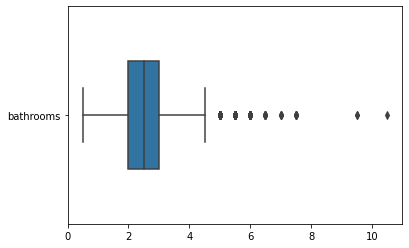

In [213]:
sns.boxplot(data=model_clean[["bathrooms"]], orient="h", width=0.5);

In [214]:
model_clean.bathrooms[model_clean["bathrooms"] > 6].count()

25

I think I'll cut out any rows that have over 4.5 bathrooms, that's only 56 rows. And we'll see how it looks after another model.

Removing any `bathrooms` over 4.5.

In [215]:
model_clean.drop(model_clean.index[model_clean['bathrooms'] > 6], inplace=True)

Checking how it looks now.

In [216]:
data_clean.bathrooms.describe()

count   30068.00
mean        2.34
std         0.89
min         0.50
25%         2.00
50%         2.50
75%         3.00
max        10.50
Name: bathrooms, dtype: float64

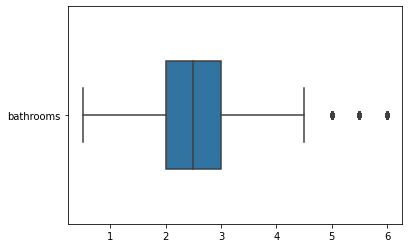

In [217]:
sns.boxplot(data=model_clean[["bathrooms"]], orient="h", width=0.5);

In [218]:
X=model_clean.drop(labels =['price', 'sale_year', 'floors'], axis=1)
y=model_clean.price

first_dummy_model = sm.OLS(y,sm.add_constant(X))
results = first_dummy_model.fit()
results.summary()

/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.491
Model:                            OLS   Adj. R-squared:                  0.490
Method:                 Least Squares   F-statistic:                     2546.
Date:                Thu, 29 Sep 2022   Prob (F-statistic):               0.00
Time:                        01:16:32   Log-Likelihood:            -4.2090e+05
No. Observations:               29094   AIC:                         8.418e+05
Df Residuals:                   29082   BIC:                         8.419e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                9.777e+05      2e+04     48.898      0.000    9.39e+05    1.02e+06
bedrooms            -6.361e+04   3893.319    -16.339      0.000   -7.12e+04    -5.6e+04
bathrooms            6.082e+04   5262.692     11.557      0.000    5.05e+04    7.11e+04
sqft_living           200.3253     12.966     15.450      0.000     174.911     225.740
sqft_lot               -0.4767      0.252     -1.891      0.059      -0.971       0.017
sqft_above            211.6655     12.747     16.605      0.000     186.681     236.650
sqft_basement         171.5096      9.315     18.412      0.000     153.252     189.767
sqft_garage          -235.3754     12.326    -19.096      0.000    -259.535    -211.216
sqft_patio            139.3755     13.161     10.590      0.000     113.579     165.171
grade_Average       -6.982e+05   1.41e+04    -49.683      0.000   -7.26e+05   -6.71e+05
grade_Below Average -7.629e+05    1.8e+04    -42.464      0.000   -7.98e+05   -7.28e+05
grade_Poor          -6.947e+05   2.69e+05     -2.586      0.010   -1.22e+06   -1.68e+05
==============================================================================
Omnibus:                     9546.075   Durbin-Watson:                   1.959
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            70486.588
Skew:                           1.382   Prob(JB):                         0.00
Kurtosis:                      10.107   Cond. No.                     1.53e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.53e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Okay, adjusting `bathrooms` seems weird. Let's try the model without `bathrooms`, since it is correlating with other variables.

In [219]:
X=model_clean.drop(labels =['price', 'sale_year', 'floors', 'bathrooms'], axis=1)
y=model_clean.price

first_dummy_model = sm.OLS(y,sm.add_constant(X))
results = first_dummy_model.fit()
results.summary()

/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.488
Model:                            OLS   Adj. R-squared:                  0.488
Method:                 Least Squares   F-statistic:                     2775.
Date:                Thu, 29 Sep 2022   Prob (F-statistic):               0.00
Time:                        01:16:32   Log-Likelihood:            -4.2096e+05
No. Observations:               29094   AIC:                         8.420e+05
Df Residuals:                   29083   BIC:                         8.420e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1.026e+06   1.96e+04     52.301      0.000    9.87e+05    1.06e+06
bedrooms            -5.684e+04   3857.687    -14.734      0.000   -6.44e+04   -4.93e+04
sqft_living           243.9238     12.433     19.618      0.000     219.554     268.294
sqft_lot               -0.9357      0.250     -3.750      0.000      -1.425      -0.447
sqft_above            201.1491     12.743     15.785      0.000     176.172     226.127
sqft_basement         164.6460      9.317     17.671      0.000     146.384     182.908
sqft_garage          -218.8418     12.270    -17.835      0.000    -242.892    -194.791
sqft_patio            151.6650     13.148     11.535      0.000     125.895     177.435
grade_Average       -6.978e+05   1.41e+04    -49.545      0.000   -7.25e+05    -6.7e+05
grade_Below Average -7.836e+05   1.79e+04    -43.740      0.000   -8.19e+05   -7.49e+05
grade_Poor          -6.968e+05   2.69e+05     -2.588      0.010   -1.22e+06   -1.69e+05
==============================================================================
Omnibus:                     9513.759   Durbin-Watson:                   1.959
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            69961.858
Skew:                           1.378   Prob(JB):                         0.00
Kurtosis:                      10.080   Cond. No.                     1.53e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.53e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Well, removing bathrooms only changed our R-value by .002. So lets not use it for now.

Let's see how 'sqft_patio' fares against `price` in a plot.

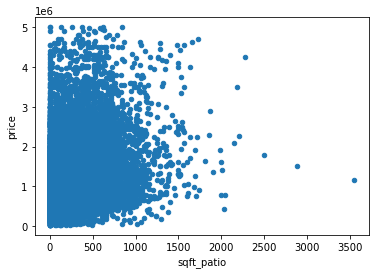

In [220]:
model_clean.plot(x="sqft_patio", y="price", kind="scatter");

Well, that doesn't seem to have a visible relationship, so lets not include that in our model for now.

In [221]:
X=model_clean.drop(labels =['price', 'sale_year', 'floors', 'bathrooms', 'sqft_patio'], axis=1)
y=model_clean.price

first_dummy_model = sm.OLS(y,sm.add_constant(X))
results = first_dummy_model.fit()
results.summary()

/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.486
Model:                            OLS   Adj. R-squared:                  0.486
Method:                 Least Squares   F-statistic:                     3055.
Date:                Thu, 29 Sep 2022   Prob (F-statistic):               0.00
Time:                        01:16:33   Log-Likelihood:            -4.2103e+05
No. Observations:               29094   AIC:                         8.421e+05
Df Residuals:                   29084   BIC:                         8.422e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1.045e+06   1.96e+04     53.344      0.000    1.01e+06    1.08e+06
bedrooms            -6.041e+04   3853.931    -15.676      0.000    -6.8e+04   -5.29e+04
sqft_living           262.7855     12.353     21.272      0.000     238.572     286.999
sqft_lot               -0.4181      0.246     -1.699      0.089      -0.900       0.064
sqft_above            194.0084     12.757     15.208      0.000     169.004     219.013
sqft_basement         166.9235      9.336     17.879      0.000     148.624     185.223
sqft_garage          -218.5774     12.298    -17.773      0.000    -242.683    -194.472
grade_Average       -7.056e+05   1.41e+04    -50.042      0.000   -7.33e+05   -6.78e+05
grade_Below Average -7.976e+05   1.79e+04    -44.520      0.000   -8.33e+05   -7.62e+05
grade_Poor          -7.214e+05    2.7e+05     -2.673      0.008   -1.25e+06   -1.93e+05
==============================================================================
Omnibus:                     9523.654   Durbin-Watson:                   1.959
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            69407.526
Skew:                           1.382   Prob(JB):                         0.00
Kurtosis:                      10.044   Cond. No.                     1.53e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.53e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

R-Value lowered again. Let's look at our heatmap again.

<AxesSubplot:>

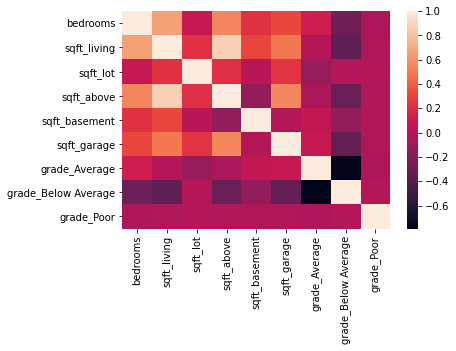

In [222]:
sns.heatmap(X.corr())

Let's remove `sqft_above` since it has a high coorelation to `sqft_lot`.

In [223]:
X=model_clean.drop(labels =['price', 'sale_year', 'floors', 'bathrooms', 'sqft_patio', 'sqft_above'], axis=1)
y=model_clean.price

first_dummy_model = sm.OLS(y,sm.add_constant(X))
results = first_dummy_model.fit()
results.summary()

/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.482
Model:                            OLS   Adj. R-squared:                  0.482
Method:                 Least Squares   F-statistic:                     3381.
Date:                Thu, 29 Sep 2022   Prob (F-statistic):               0.00
Time:                        01:16:33   Log-Likelihood:            -4.2115e+05
No. Observations:               29094   AIC:                         8.423e+05
Df Residuals:                   29085   BIC:                         8.424e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1.098e+06   1.93e+04     56.739      0.000    1.06e+06    1.14e+06
bedrooms            -6.132e+04   3868.691    -15.851      0.000   -6.89e+04   -5.37e+04
sqft_living           433.2417      5.214     83.086      0.000     423.021     443.462
sqft_lot               -0.4577      0.247     -1.853      0.064      -0.942       0.026
sqft_basement          49.3675      5.256      9.392      0.000      39.065      59.670
sqft_garage          -180.0316     12.082    -14.901      0.000    -203.712    -156.351
grade_Average       -7.222e+05   1.41e+04    -51.173      0.000    -7.5e+05   -6.95e+05
grade_Below Average -8.146e+05    1.8e+04    -45.377      0.000    -8.5e+05   -7.79e+05
grade_Poor          -7.526e+05   2.71e+05     -2.778      0.005   -1.28e+06   -2.22e+05
==============================================================================
Omnibus:                     9602.761   Durbin-Watson:                   1.958
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            69444.349
Skew:                           1.398   Prob(JB):                         0.00
Kurtosis:                      10.033   Cond. No.                     1.53e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.53e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Our `sqft_lot` P-value snuck up again. Let's look at how it's plotting against `price` again.

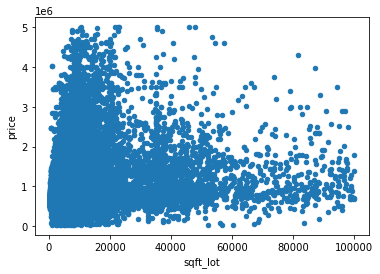

In [224]:
model_clean.plot(x="sqft_lot", y="price", kind="scatter");

From the scatter plot, it almost looks like there could be 2 seperate relationships here. Possibly urban plots versus larger rural plots.

Before we do triming of `sqft_lot`, let's remove bedrooms from the model, and see what happens.

In [225]:
X=model_clean.drop(labels =['price', 'sale_year', 'floors', 'bathrooms', 'sqft_patio', 'sqft_above', 'bedrooms'], axis=1)
y=model_clean.price

first_dummy_model = sm.OLS(y,sm.add_constant(X))
results = first_dummy_model.fit()
results.summary()

/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.477
Model:                            OLS   Adj. R-squared:                  0.477
Method:                 Least Squares   F-statistic:                     3795.
Date:                Thu, 29 Sep 2022   Prob (F-statistic):               0.00
Time:                        01:16:33   Log-Likelihood:            -4.2127e+05
No. Observations:               29094   AIC:                         8.426e+05
Df Residuals:                   29086   BIC:                         8.426e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1.022e+06   1.88e+04     54.283      0.000    9.85e+05    1.06e+06
sqft_living           385.8483      4.290     89.932      0.000     377.439     394.258
sqft_lot               -0.1850      0.247     -0.748      0.455      -0.670       0.300
sqft_basement          47.7000      5.278      9.038      0.000      37.356      58.045
sqft_garage          -180.7072     12.134    -14.893      0.000    -204.490    -156.925
grade_Average       -7.627e+05   1.39e+04    -54.721      0.000    -7.9e+05   -7.35e+05
grade_Below Average -8.476e+05   1.79e+04    -47.332      0.000   -8.83e+05   -8.12e+05
grade_Poor          -7.412e+05   2.72e+05     -2.725      0.006   -1.27e+06   -2.08e+05
==============================================================================
Omnibus:                     9713.039   Durbin-Watson:                   1.956
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            70352.465
Skew:                           1.416   Prob(JB):                         0.00
Kurtosis:                      10.072   Cond. No.                     1.53e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.53e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<AxesSubplot:>

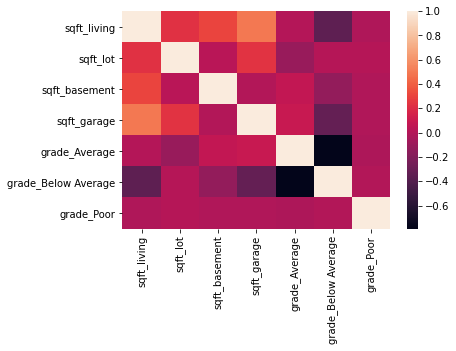

In [226]:
sns.heatmap(X.corr())

And let's remove `sqft_garage` next.

In [227]:
X=model_clean.drop(labels =['price', 'sale_year', 'floors', 'bathrooms', 'sqft_patio', 'sqft_above', 'bedrooms', 'sqft_garage'], axis=1)
y=model_clean.price

first_dummy_model = sm.OLS(y,sm.add_constant(X))
results = first_dummy_model.fit()
results.summary()

/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.473
Model:                            OLS   Adj. R-squared:                  0.473
Method:                 Least Squares   F-statistic:                     4358.
Date:                Thu, 29 Sep 2022   Prob (F-statistic):               0.00
Time:                        01:16:34   Log-Likelihood:            -4.2138e+05
No. Observations:               29094   AIC:                         8.428e+05
Df Residuals:                   29087   BIC:                         8.428e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                9.912e+05   1.88e+04     52.756      0.000    9.54e+05    1.03e+06
sqft_living           363.0689      4.024     90.232      0.000     355.182     370.956
sqft_lot               -0.7515      0.245     -3.062      0.002      -1.233      -0.271
sqft_basement          62.0221      5.209     11.907      0.000      51.812      72.232
grade_Average       -7.465e+05   1.39e+04    -53.518      0.000   -7.74e+05   -7.19e+05
grade_Below Average -8.007e+05   1.77e+04    -45.251      0.000   -8.35e+05   -7.66e+05
grade_Poor          -6.853e+05   2.73e+05     -2.510      0.012   -1.22e+06    -1.5e+05
==============================================================================
Omnibus:                     9741.115   Durbin-Watson:                   1.958
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            70172.675
Skew:                           1.423   Prob(JB):                         0.00
Kurtosis:                      10.056   Cond. No.                     1.53e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.53e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Another reduction of R-value, let's try something drastic. We'll take `sqft_lot` out of this and readd some other columns to see what happens.

In [228]:
X=model_clean.drop(labels =['price', 'sale_year', 'sqft_lot', 'floors'], axis=1)
y=model_clean.price

first_dummy_model = sm.OLS(y,sm.add_constant(X))
results = first_dummy_model.fit()
results.summary()

/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.491
Model:                            OLS   Adj. R-squared:                  0.490
Method:                 Least Squares   F-statistic:                     2800.
Date:                Thu, 29 Sep 2022   Prob (F-statistic):               0.00
Time:                        01:16:34   Log-Likelihood:            -4.2090e+05
No. Observations:               29094   AIC:                         8.418e+05
Df Residuals:                   29083   BIC:                         8.419e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                9.747e+05   1.99e+04     48.903      0.000    9.36e+05    1.01e+06
bedrooms             -6.34e+04   3891.854    -16.290      0.000    -7.1e+04   -5.58e+04
bathrooms            6.239e+04   5197.209     12.004      0.000    5.22e+04    7.26e+04
sqft_living           198.1213     12.914     15.341      0.000     172.809     223.434
sqft_above            211.9764     12.746     16.630      0.000     186.993     236.960
sqft_basement         171.9824      9.312     18.469      0.000     153.731     190.234
sqft_garage          -239.2227     12.157    -19.677      0.000    -263.052    -215.394
sqft_patio            134.6545     12.922     10.420      0.000     109.326     159.983
grade_Average        -6.98e+05   1.41e+04    -49.672      0.000   -7.26e+05    -6.7e+05
grade_Below Average -7.645e+05   1.79e+04    -42.601      0.000      -8e+05   -7.29e+05
grade_Poor          -7.039e+05   2.69e+05     -2.621      0.009   -1.23e+06   -1.77e+05
==============================================================================
Omnibus:                     9516.107   Durbin-Watson:                   1.959
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            70069.789
Skew:                           1.378   Prob(JB):                         0.00
Kurtosis:                      10.086   Cond. No.                     3.00e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  3e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

We jumped back up to a .491 R-value. Time for the heatmap again.

<AxesSubplot:>

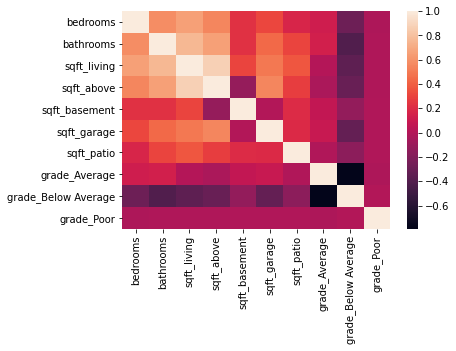

In [229]:
sns.heatmap(X.corr())

`bedrooms`, `bathrooms`, `sqft_living`, and `sqft_above` are all correlated. Lets remove the living, garage, basement and above square footage and see what happens.

In [230]:
X=model_clean.drop(labels =['price', 'sale_year', 'sqft_lot', 'floors', 'sqft_living', 'sqft_above', 'sqft_garage', 'sqft_basement', 'sqft_patio'], axis=1)
y=model_clean.price

first_dummy_model = sm.OLS(y,sm.add_constant(X))
results = first_dummy_model.fit()
results.summary()

/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.392
Model:                            OLS   Adj. R-squared:                  0.392
Method:                 Least Squares   F-statistic:                     3752.
Date:                Thu, 29 Sep 2022   Prob (F-statistic):               0.00
Time:                        01:16:34   Log-Likelihood:            -4.2347e+05
No. Observations:               29094   AIC:                         8.470e+05
Df Residuals:                   29088   BIC:                         8.470e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1.353e+06   2.05e+04     66.116      0.000    1.31e+06    1.39e+06
bedrooms             5.168e+04   3807.807     13.571      0.000    4.42e+04    5.91e+04
bathrooms            2.436e+05   4755.467     51.236      0.000    2.34e+05    2.53e+05
grade_Average       -1.088e+06   1.38e+04    -78.607      0.000   -1.11e+06   -1.06e+06
grade_Below Average -1.189e+06   1.79e+04    -66.480      0.000   -1.22e+06   -1.15e+06
grade_Poor          -1.186e+06   2.93e+05     -4.045      0.000   -1.76e+06   -6.12e+05
==============================================================================
Omnibus:                     9979.942   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            57324.978
Skew:                           1.540   Prob(JB):                         0.00
Kurtosis:                       9.149   Cond. No.                         440.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Well, that didn't help. Let's try removing the house grading instead.

In [231]:
X=model_clean.drop(labels =['price', 'sqft_lot', 'sale_year', 'floors', 'grade_Average', 'grade_Below Average', 'grade_Poor'], axis=1)
y=model_clean.price

first_dummy_model = sm.OLS(y,sm.add_constant(X))
results = first_dummy_model.fit()
results.summary()

/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.447
Model:                            OLS   Adj. R-squared:                  0.447
Method:                 Least Squares   F-statistic:                     3362.
Date:                Thu, 29 Sep 2022   Prob (F-statistic):               0.00
Time:                        01:16:34   Log-Likelihood:            -4.2209e+05
No. Observations:               29094   AIC:                         8.442e+05
Df Residuals:                   29086   BIC:                         8.443e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1.698e+05   1.12e+04     15.114      0.000    1.48e+05    1.92e+05
bedrooms      -9.651e+04   3988.179    -24.200      0.000   -1.04e+05   -8.87e+04
bathrooms      6.336e+04   5297.851     11.960      0.000     5.3e+04    7.37e+04
sqft_living     262.5159     13.381     19.619      0.000     236.289     288.743
sqft_above      262.3795     13.233     19.827      0.000     236.442     288.317
sqft_basement   185.1559      9.688     19.113      0.000     166.168     204.144
sqft_garage    -199.0857     12.476    -15.958      0.000    -223.539    -174.633
sqft_patio      167.0347     13.441     12.427      0.000     140.690     193.379
==============================================================================
Omnibus:                     9135.011   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            55905.448
Skew:                           1.372   Prob(JB):                         0.00
Kurtosis:                       9.212   Cond. No.                     1.25e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.25e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Didn't really help, lets check for more outliers.

Outliers for `Bedrooms`.

In [232]:
model_clean.bedrooms.describe()

count   29094.00
mean        3.41
std         0.96
min         1.00
25%         3.00
50%         3.00
75%         4.00
max        11.00
Name: bedrooms, dtype: float64

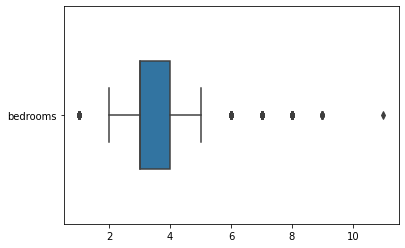

In [233]:
sns.boxplot(data=model_clean[["bedrooms"]], orient="h", width=0.5);

In [234]:
model_clean.bedrooms[model_clean["bedrooms"] > 6].count()

118

Lets cut out any rows with any `bedrooms` over 6. 

In [235]:
model_clean.drop(model_clean.index[model_clean['bedrooms'] > 6], inplace=True)

Now lets see how it looks.

In [236]:
model_clean.bedrooms.describe()

count   28976.00
mean        3.39
std         0.92
min         1.00
25%         3.00
50%         3.00
75%         4.00
max         6.00
Name: bedrooms, dtype: float64

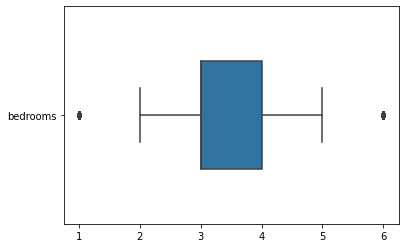

In [237]:
sns.boxplot(data=model_clean[["bedrooms"]], orient="h", width=0.5);

In [238]:
# Final Model

In [239]:
X=model_clean.drop(labels =['price', 'sqft_lot', 'sale_year', 'floors'], axis=1)
y=model_clean.price

first_dummy_model = sm.OLS(y,sm.add_constant(X))
results = first_dummy_model.fit()
results.summary()

/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.490
Model:                            OLS   Adj. R-squared:                  0.490
Method:                 Least Squares   F-statistic:                     2786.
Date:                Thu, 29 Sep 2022   Prob (F-statistic):               0.00
Time:                        01:16:35   Log-Likelihood:            -4.1918e+05
No. Observations:               28976   AIC:                         8.384e+05
Df Residuals:                   28965   BIC:                         8.385e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                9.706e+05   2.02e+04     48.163      0.000    9.31e+05    1.01e+06
bedrooms            -6.224e+04   4055.482    -15.348      0.000   -7.02e+04   -5.43e+04
bathrooms            6.258e+04   5231.636     11.961      0.000    5.23e+04    7.28e+04
sqft_living           198.3610     12.983     15.279      0.000     172.914     223.808
sqft_above            213.2114     12.808     16.646      0.000     188.107     238.316
sqft_basement         172.5682      9.336     18.484      0.000     154.269     190.867
sqft_garage          -242.5409     12.247    -19.804      0.000    -266.546    -218.536
sqft_patio            132.4807     12.966     10.218      0.000     107.067     157.894
grade_Average       -6.997e+05   1.41e+04    -49.640      0.000   -7.27e+05   -6.72e+05
grade_Below Average -7.647e+05    1.8e+04    -42.522      0.000      -8e+05   -7.29e+05
grade_Poor          -7.023e+05   2.68e+05     -2.616      0.009   -1.23e+06   -1.76e+05
==============================================================================
Omnibus:                     9507.968   Durbin-Watson:                   1.959
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            70208.282
Skew:                           1.382   Prob(JB):                         0.00
Kurtosis:                      10.107   Cond. No.                     2.98e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.98e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Back at .490 with all our predictors. This will be the final model for the presentation. Further attempts went down a rabbit hole of worse results.

## Regression Results

## Conclusion

Well, the regression doesn't fit that well with a R-Squared of only .490. The the modeled predictors are statistically significant, though. The base constant for my last model is 970,600. The main predictors affecting this model is the building condition, bedrooms, and bathrooms. The condition of the house is assumed to be "Above Average", but lower grades lower the overall price. Although, the poor grade seems to have less of an effect on the price, but then the standard error on that predictor is larger then "Average" and ""Below Average". For some reason, the more bedrooms there is seems to lower the price of the house. And each bathroom increases the price by 62,580, this seems high though.

## Limitations

This analysis wasn't the greatest. I should of included more predictors and winnowed out more of the colinear predictors. I also think we could of split up the zip codes into rural/urbans and done two sperate linear regressions. I think this would have shown differences in the base price and lot size effects on property values.

## Level Up: Project Enhancements

After completing the minimum project requirements, you could consider the following enhancements if you have time:

* Consider applying a linear or non-linear transformation to your features and/or target
* Investigate the linear regression assumptions for your final model
* Identify and remove outliers, then redo the analysis
* Compile the data cleaning code into a function

# The End - Before the Rabbit Hole.... :>

# The Rabbit Hole of trying to get a better R-value.

<AxesSubplot:>

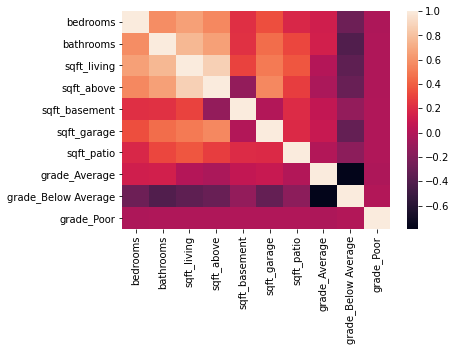

In [88]:
sns.heatmap(X.corr())

Let's try no `bedrooms` or `bathrooms` now.

In [89]:
X=model_clean.drop(labels =['price', 'sqft_lot', 'sale_year', 'floors', 'bedrooms', 'bathrooms'], axis=1)
y=model_clean.price

first_dummy_model = sm.OLS(y,sm.add_constant(X))
results = first_dummy_model.fit()
results.summary()

/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.484
Method:                 Least Squares   F-statistic:                     3402.
Date:                Thu, 29 Sep 2022   Prob (F-statistic):               0.00
Time:                        00:40:44   Log-Likelihood:            -4.1934e+05
No. Observations:               28976   AIC:                         8.387e+05
Df Residuals:                   28967   BIC:                         8.388e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                9.459e+05   1.91e+04     49.475      0.000    9.08e+05    9.83e+05
sqft_living           197.5750     12.089     16.344      0.000     173.881     221.269
sqft_above            206.0195     12.846     16.038      0.000     180.841     231.198
sqft_basement         165.7596      9.373     17.686      0.000     147.389     184.130
sqft_garage          -232.0329     12.257    -18.931      0.000    -256.057    -208.009
sqft_patio            156.7999     12.969     12.091      0.000     131.381     182.219
grade_Average       -7.329e+05    1.4e+04    -52.488      0.000    -7.6e+05   -7.06e+05
grade_Below Average -8.136e+05   1.79e+04    -45.493      0.000   -8.49e+05   -7.79e+05
grade_Poor          -6.948e+05    2.7e+05     -2.573      0.010   -1.22e+06   -1.66e+05
==============================================================================
Omnibus:                     9545.625   Durbin-Watson:                   1.957
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            70237.602
Skew:                           1.389   Prob(JB):                         0.00
Kurtosis:                      10.103   Cond. No.                     2.98e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.98e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Let's check out 'sqft_living' and see how it does against price.

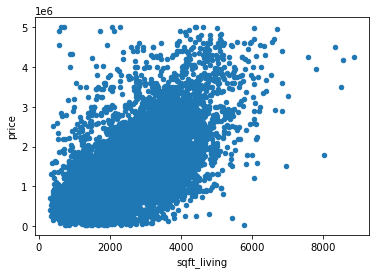

In [90]:
model_clean.plot(x="sqft_living", y="price", kind="scatter");

Let's cut down the `sqft_living` and see if the relationship clears up some. There could be a linear one in there, but buried.

In [91]:
model_clean.sqft_living.describe()

count   28976.00
mean     2067.11
std       890.10
min       310.00
25%      1410.00
50%      1900.00
75%      2570.00
max      8882.00
Name: sqft_living, dtype: float64

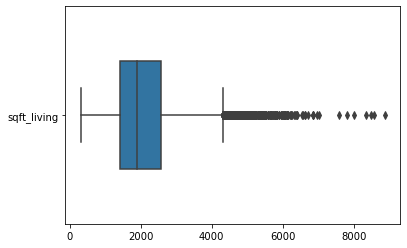

In [92]:
sns.boxplot(data=model_clean[["sqft_living"]], orient="h", width=0.5);

There are quite a few outliers in the `sqft_living`, so we will limit the range to a max of 5,000 since that is just over 3 standard deviations from the mean from these 2 years. 

In [93]:
model_clean.drop(model_clean.index[model_clean['sqft_living'] > 5000], inplace=True)

Now lets see how it looks.

In [94]:
model_clean.sqft_living.describe()

count   28788.00
mean     2043.72
std       842.57
min       310.00
25%      1400.00
50%      1890.00
75%      2550.00
max      5000.00
Name: sqft_living, dtype: float64

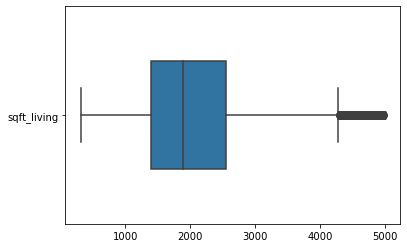

In [95]:
sns.boxplot(data=model_clean[["sqft_living"]], orient="h", width=0.5);

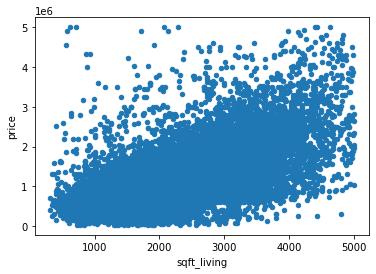

In [96]:
model_clean.plot(x="sqft_living", y="price", kind="scatter");

Here we go again with the model.

In [97]:
X=model_clean.drop(labels =['price', 'sale_year', 'floors'], axis=1)
y=model_clean.price

first_dummy_model = sm.OLS(y,sm.add_constant(X))
results = first_dummy_model.fit()
results.summary()

/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.457
Method:                 Least Squares   F-statistic:                     2199.
Date:                Thu, 29 Sep 2022   Prob (F-statistic):               0.00
Time:                        00:40:44   Log-Likelihood:            -4.1613e+05
No. Observations:               28788   AIC:                         8.323e+05
Df Residuals:                   28776   BIC:                         8.324e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                9.644e+05   2.02e+04     47.851      0.000    9.25e+05       1e+06
bedrooms            -6.287e+04   4051.449    -15.518      0.000   -7.08e+04   -5.49e+04
bathrooms            5.804e+04   5277.255     10.998      0.000    4.77e+04    6.84e+04
sqft_living           203.1502     13.069     15.545      0.000     177.535     228.765
sqft_lot               -0.2836      0.253     -1.121      0.262      -0.779       0.212
sqft_above            209.4806     12.811     16.351      0.000     184.370     234.591
sqft_basement         173.1186      9.312     18.592      0.000     154.868     191.370
sqft_garage          -238.1046     12.384    -19.227      0.000    -262.377    -213.832
sqft_patio            135.4272     13.252     10.219      0.000     109.453     161.402
grade_Average       -6.835e+05   1.42e+04    -48.108      0.000   -7.11e+05   -6.56e+05
grade_Below Average -7.503e+05    1.8e+04    -41.745      0.000   -7.86e+05   -7.15e+05
grade_Poor          -6.845e+05   2.65e+05     -2.578      0.010    -1.2e+06   -1.64e+05
==============================================================================
Omnibus:                     9967.429   Durbin-Watson:                   1.959
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            74339.917
Skew:                           1.469   Prob(JB):                         0.00
Kurtosis:                      10.304   Cond. No.                     1.51e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Let's go lower with price to about 3 million.

In [98]:
model_clean.drop(model_clean.index[model_clean['price'] > 3000000], inplace=True)

In [99]:
model_clean.price.describe()

count     28313.00
mean     995026.78
std      524318.49
min       27360.00
25%      635000.00
50%      841000.00
75%     1238000.00
max     3000000.00
Name: price, dtype: float64

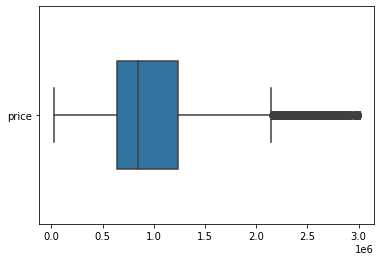

In [100]:
sns.boxplot(data=model_clean[["price"]], orient="h", width=0.5);

In [101]:
X=model_clean.drop(labels =['price', 'sale_year', 'floors'], axis=1)
y=model_clean.price

first_dummy_model = sm.OLS(y,sm.add_constant(X))
results = first_dummy_model.fit()
results.summary()

/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.422
Model:                            OLS   Adj. R-squared:                  0.422
Method:                 Least Squares   F-statistic:                     1877.
Date:                Thu, 29 Sep 2022   Prob (F-statistic):               0.00
Time:                        00:40:45   Log-Likelihood:            -4.0530e+05
No. Observations:               28313   AIC:                         8.106e+05
Df Residuals:                   28301   BIC:                         8.107e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                8.306e+05   1.82e+04     45.647      0.000    7.95e+05    8.66e+05
bedrooms             -4.83e+04   3561.808    -13.560      0.000   -5.53e+04   -4.13e+04
bathrooms            4.338e+04   4655.006      9.318      0.000    3.43e+04    5.25e+04
sqft_living           194.6276     11.560     16.837      0.000     171.970     217.285
sqft_lot               -0.3809      0.222     -1.716      0.086      -0.816       0.054
sqft_above            170.4966     11.338     15.037      0.000     148.273     192.720
sqft_basement         148.0304      8.218     18.014      0.000     131.924     164.137
sqft_garage          -187.6164     10.921    -17.179      0.000    -209.023    -166.210
sqft_patio            114.6075     11.731      9.770      0.000      91.615     137.600
grade_Average       -4.959e+05   1.33e+04    -37.252      0.000   -5.22e+05    -4.7e+05
grade_Below Average -5.876e+05   1.64e+04    -35.895      0.000    -6.2e+05   -5.56e+05
grade_Poor          -5.257e+05   2.31e+05     -2.278      0.023   -9.78e+05   -7.33e+04
==============================================================================
Omnibus:                     4045.176   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10023.477
Skew:                           0.815   Prob(JB):                         0.00
Kurtosis:                       5.417   Cond. No.                     1.49e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.49e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Okay, back to looking at lot size, let's see if we can trim it enough to clean up enough so we don't see two potential sets of linear regression.

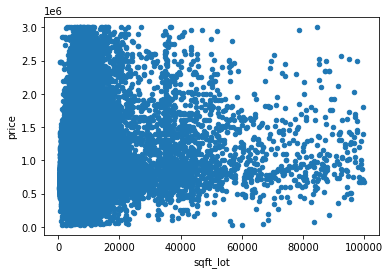

In [102]:
model_clean.plot(x="sqft_lot", y="price", kind="scatter");

In [103]:
model_clean.sqft_lot.describe()

count   28313.00
mean     9874.21
std     11477.49
min       402.00
25%      4741.00
50%      7273.00
75%     10000.00
max     99916.00
Name: sqft_lot, dtype: float64

Let's drop the limit down to 50,000 square foot and see what happens.

In [104]:
model_clean.drop(model_clean.index[model_clean['sqft_lot'] > 50000], inplace=True)

In [105]:
model_clean.sqft_lot.describe()

count   27759.00
mean     8680.45
std      7556.65
min       402.00
25%      4672.00
50%      7210.00
75%      9773.00
max     50000.00
Name: sqft_lot, dtype: float64

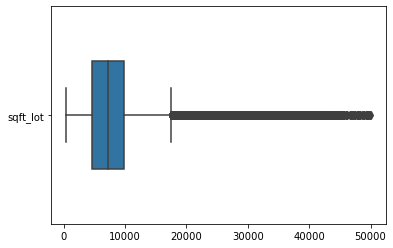

In [106]:
sns.boxplot(data=model_clean[["sqft_lot"]], orient="h", width=0.5);

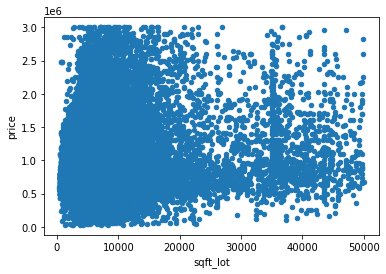

In [107]:
model_clean.plot(x="sqft_lot", y="price", kind="scatter");

Still a viable double set, but lets look at the model.

In [108]:
X=model_clean.drop(labels =['price', 'sale_year', 'floors'], axis=1)
y=model_clean.price

first_dummy_model = sm.OLS(y,sm.add_constant(X))
results = first_dummy_model.fit()
results.summary()

/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.425
Model:                            OLS   Adj. R-squared:                  0.425
Method:                 Least Squares   F-statistic:                     1867.
Date:                Thu, 29 Sep 2022   Prob (F-statistic):               0.00
Time:                        00:40:45   Log-Likelihood:            -3.9723e+05
No. Observations:               27759   AIC:                         7.945e+05
Df Residuals:                   27747   BIC:                         7.946e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                8.395e+05   1.85e+04     45.410      0.000    8.03e+05    8.76e+05
bedrooms            -5.043e+04   3591.396    -14.042      0.000   -5.75e+04   -4.34e+04
bathrooms            4.313e+04   4721.929      9.133      0.000    3.39e+04    5.24e+04
sqft_living           197.3174     11.690     16.879      0.000     174.405     220.230
sqft_lot                0.0456      0.346      0.132      0.895      -0.632       0.724
sqft_above            171.5748     11.443     14.994      0.000     149.146     194.003
sqft_basement         152.5777      8.281     18.425      0.000     136.347     168.809
sqft_garage          -198.6329     11.297    -17.583      0.000    -220.775    -176.491
sqft_patio            117.4002     12.085      9.714      0.000      93.713     141.088
grade_Average       -5.066e+05   1.36e+04    -37.353      0.000   -5.33e+05    -4.8e+05
grade_Below Average -6.039e+05   1.66e+04    -36.369      0.000   -6.36e+05   -5.71e+05
grade_Poor          -5.444e+05    2.3e+05     -2.369      0.018   -9.95e+05    -9.4e+04
==============================================================================
Omnibus:                     3983.439   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9753.950
Skew:                           0.821   Prob(JB):                         0.00
Kurtosis:                       5.395   Cond. No.                     1.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Let's try cutting max price down again.

In [109]:
model_clean.price.describe()

count     27759.00
mean     991713.38
std      523429.03
min       27360.00
25%      634118.00
50%      839000.00
75%     1230000.00
max     3000000.00
Name: price, dtype: float64

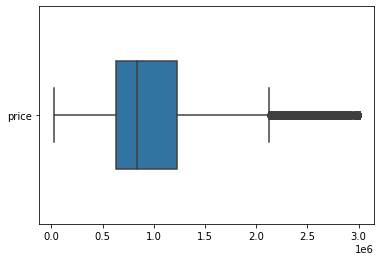

In [110]:
sns.boxplot(data=model_clean[["price"]], orient="h", width=0.5);

Let's drop the price down to $3 million.

In [111]:
model_clean.drop(model_clean.index[model_clean['price'] > 3000000], inplace=True)

In [112]:
model_clean.price.describe()

count     27759.00
mean     991713.38
std      523429.03
min       27360.00
25%      634118.00
50%      839000.00
75%     1230000.00
max     3000000.00
Name: price, dtype: float64

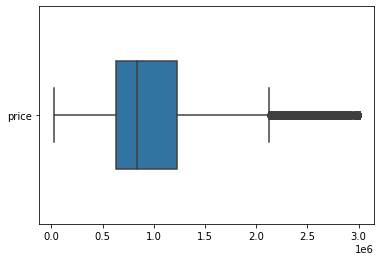

In [113]:
sns.boxplot(data=model_clean[["price"]], orient="h", width=0.5);

In [114]:
X=model_clean.drop(labels =['price', 'sale_year', 'floors'], axis=1)
y=model_clean.price

first_dummy_model = sm.OLS(y,sm.add_constant(X))
results = first_dummy_model.fit()
results.summary()

/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.425
Model:                            OLS   Adj. R-squared:                  0.425
Method:                 Least Squares   F-statistic:                     1867.
Date:                Thu, 29 Sep 2022   Prob (F-statistic):               0.00
Time:                        00:40:46   Log-Likelihood:            -3.9723e+05
No. Observations:               27759   AIC:                         7.945e+05
Df Residuals:                   27747   BIC:                         7.946e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                8.395e+05   1.85e+04     45.410      0.000    8.03e+05    8.76e+05
bedrooms            -5.043e+04   3591.396    -14.042      0.000   -5.75e+04   -4.34e+04
bathrooms            4.313e+04   4721.929      9.133      0.000    3.39e+04    5.24e+04
sqft_living           197.3174     11.690     16.879      0.000     174.405     220.230
sqft_lot                0.0456      0.346      0.132      0.895      -0.632       0.724
sqft_above            171.5748     11.443     14.994      0.000     149.146     194.003
sqft_basement         152.5777      8.281     18.425      0.000     136.347     168.809
sqft_garage          -198.6329     11.297    -17.583      0.000    -220.775    -176.491
sqft_patio            117.4002     12.085      9.714      0.000      93.713     141.088
grade_Average       -5.066e+05   1.36e+04    -37.353      0.000   -5.33e+05    -4.8e+05
grade_Below Average -6.039e+05   1.66e+04    -36.369      0.000   -6.36e+05   -5.71e+05
grade_Poor          -5.444e+05    2.3e+05     -2.369      0.018   -9.95e+05    -9.4e+04
==============================================================================
Omnibus:                     3983.439   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9753.950
Skew:                           0.821   Prob(JB):                         0.00
Kurtosis:                       5.395   Cond. No.                     1.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Well, `sqft_lot` is behaving again somewhat accourding to it's P-value, but our R-square is still at .425.

Heatmap time!

<AxesSubplot:>

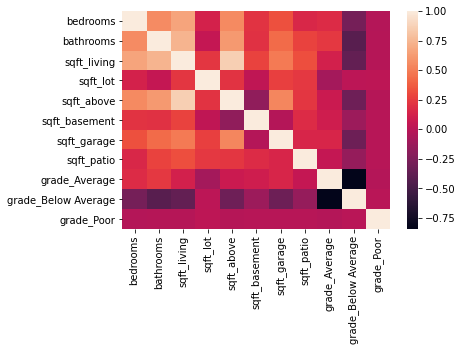

In [115]:
sns.heatmap(X.corr())

Let's remove those high correlations again, and see what happens.

In [116]:
X=model_clean.drop(labels =['price', 'sqft_lot', 'sale_year', 'floors', 'bedrooms', 'bathrooms', 'sqft_above'], axis=1)
y=model_clean.price

first_dummy_model = sm.OLS(y,sm.add_constant(X))
results = first_dummy_model.fit()
results.summary()

/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.416
Model:                            OLS   Adj. R-squared:                  0.416
Method:                 Least Squares   F-statistic:                     2821.
Date:                Thu, 29 Sep 2022   Prob (F-statistic):               0.00
Time:                        00:40:46   Log-Likelihood:            -3.9746e+05
No. Observations:               27759   AIC:                         7.949e+05
Df Residuals:                   27751   BIC:                         7.950e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                8.573e+05   1.73e+04     49.548      0.000    8.23e+05    8.91e+05
sqft_living           334.7967      3.971     84.318      0.000     327.014     342.579
sqft_basement          47.9534      4.731     10.136      0.000      38.681      57.226
sqft_garage          -157.8378     10.796    -14.621      0.000    -178.998    -136.678
sqft_patio            127.6865     11.870     10.757      0.000     104.421     150.952
grade_Average       -5.442e+05   1.35e+04    -40.372      0.000   -5.71e+05   -5.18e+05
grade_Below Average -6.534e+05   1.66e+04    -39.465      0.000   -6.86e+05   -6.21e+05
grade_Poor          -5.615e+05   2.32e+05     -2.425      0.015   -1.02e+06   -1.08e+05
==============================================================================
Omnibus:                     4014.201   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9684.461
Skew:                           0.832   Prob(JB):                         0.00
Kurtosis:                       5.367   Cond. No.                     2.18e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.18e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<AxesSubplot:>

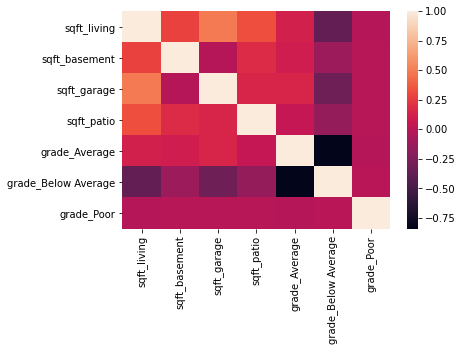

In [117]:
sns.heatmap(X.corr())

In [118]:
X=model_clean.drop(labels =['price', 'sqft_lot', 'sale_year', 'floors', 'bedrooms', 'bathrooms', 'sqft_above', 'sqft_basement', 'sqft_patio'], axis=1)
y=model_clean.price

first_dummy_model = sm.OLS(y,sm.add_constant(X))
results = first_dummy_model.fit()
results.summary()

/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.411
Model:                            OLS   Adj. R-squared:                  0.411
Method:                 Least Squares   F-statistic:                     3867.
Date:                Thu, 29 Sep 2022   Prob (F-statistic):               0.00
Time:                        00:40:47   Log-Likelihood:            -3.9758e+05
No. Observations:               27759   AIC:                         7.952e+05
Df Residuals:                   27753   BIC:                         7.952e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                8.669e+05   1.73e+04     50.040      0.000    8.33e+05    9.01e+05
sqft_living           357.0952      3.713     96.187      0.000     349.819     364.372
sqft_garage          -180.9009     10.649    -16.988      0.000    -201.773    -160.028
grade_Average       -5.429e+05   1.35e+04    -40.256      0.000   -5.69e+05   -5.17e+05
grade_Below Average -6.611e+05   1.66e+04    -39.865      0.000   -6.94e+05   -6.29e+05
grade_Poor          -5.724e+05   2.33e+05     -2.461      0.014   -1.03e+06   -1.16e+05
==============================================================================
Omnibus:                     4010.067   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9429.288
Skew:                           0.839   Prob(JB):                         0.00
Kurtosis:                       5.310   Cond. No.                     2.11e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.11e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""